<a href="https://colab.research.google.com/github/Nicovirdiano/capture-webcam/blob/main/capture_webcam_with_google_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

# Nueva sección

<IPython.core.display.Javascript object>

Saved to photo.jpg


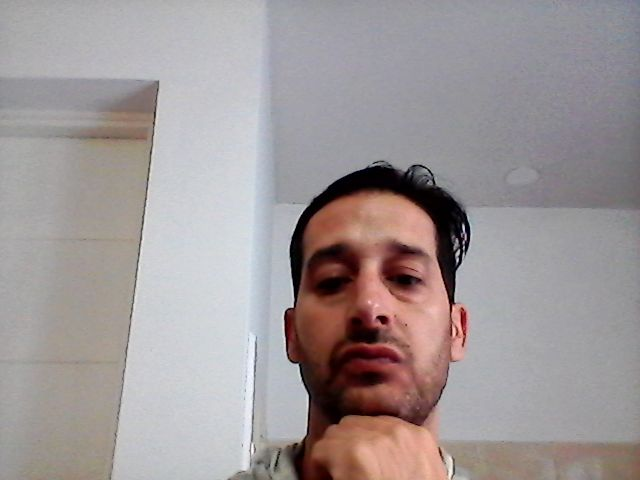

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

In [ ]:
from google.colab import files
files.download('photo.jpg')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

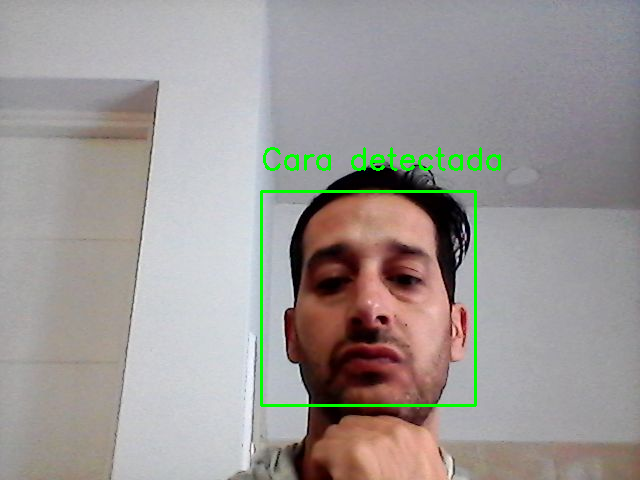

In [ ]:
 
import cv2
from google.colab.patches import cv2_imshow
import numpy as np


# Cargar la imagen capturada
img = cv2.imread('/content/photo.jpg')


# Cargar el archivo de cascada frontal para la detección de caras
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Convertir la imagen a escala de grises
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# Realizar la detección de caras
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

# Dibujar un rectángulo alrededor de cada cara detectada
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 2)

    text = "Cara detectada"
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 1
    thickness = 2
    color = (0, 255, 0)
    text_size, _ = cv2.getTextSize(text, font, font_scale, thickness)
    cv2.putText(img, text, (x, y - text_size[1]), font, font_scale, color, thickness)

    cv2_imshow(img)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
